<a href="https://colab.research.google.com/github/yongjaeahn/python_coding/blob/main/korean/source/06_10_%EC%88%98%ED%95%99_numpy_sympy_scipy_%EB%AF%B8%EC%A0%81%EB%B6%84%EA%B3%BC_%EB%AF%B8%EB%B6%84_%EB%B0%A9%EC%A0%95%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

	numpy/sympy/scipy 미적분과 미분 방정식

미분

In [ ]:
import numpy as np

f = np.poly1d([3,-2,0,4])

f_diff = np.polyder(f)
f_2nd_diff = np.polyder(f,2)
f_3rd_diff = np.polyder(f,3)
print('방정식 : f(x)=\n', f)
print('미분한 방정식 :\n',f_diff)
print('2차 미분한 방정식 :',f_2nd_diff)
print('3차 미분한 방정식 :',f_3rd_diff)

방정식 : f(x)=
    3     2
3 x - 2 x + 4
미분한 방정식 :
    2
9 x - 4 x
2차 미분한 방정식 :  
18 x - 4
3차 미분한 방정식 :  
18


In [ ]:
print('x값이 [-1,0,1]일때 미분계수 :', f_diff([-1,0,1]))

x값이 [-1,0,1]일때 미분계수 : [13  0  5]


In [ ]:
def my_poly_der(x, delta_x):
  return abs(f(x+delta_x) - f(x)) / delta_x

delta_x = 0.001
print('x값이 -1일때 미분계수 :', my_poly_der(-1,delta_x))
print('x값이 0일때 미분계수 :', my_poly_der(0,delta_x))
print('x값이 1일때 미분계수 :', my_poly_der(1,delta_x))

x값이 -1일때 미분계수 : 12.989003000000388
x값이 0일때 미분계수 : 0.001997000000031335
x값이 1일때 미분계수 : 5.007002999999344


In [ ]:
delta_x = 0.0001
print('x값이 -1일때 미분계수 :', my_poly_der(-1,delta_x))
print('x값이 0일때 미분계수 :', my_poly_der(0,delta_x))
print('x값이 1일때 미분계수 :', my_poly_der(1,delta_x))

x값이 -1일때 미분계수 : 12.998900029996818
x값이 0일때 미분계수 : 0.00019997000055838043
x값이 1일때 미분계수 : 5.0007000300045235


In [ ]:
num_of_xs = 10000
x = np.linspace(-1,1,num_of_xs)
y = f(x)

dx = np.diff(x)
dy = np.diff(y)
derivative = dy/dx

print(x[0],derivative[0])
print(x[num_of_xs-1],derivative[num_of_xs-2])

-1.0 12.997799900003047
1.0 4.998599980008064


방정식 : f(x)=
    2
1 x + 2 x + 1
미분한 방정식 :
  
2 x + 2
x값이 [-7.5,0,5]일때 미분계수 : [-13.   2.  12.]


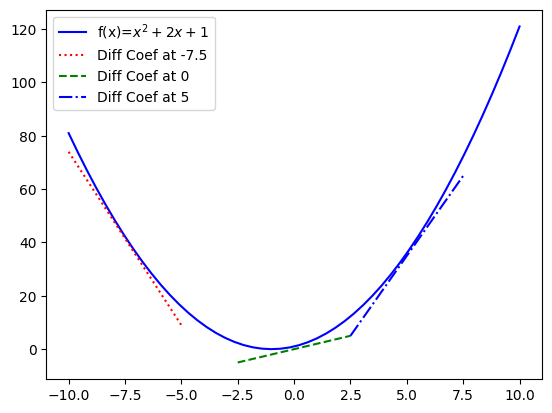

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

f = np.poly1d([1,2,1])

f_diff = np.polyder(f)
print('방정식 : f(x)=\n', f)
print('미분한 방정식 :\n',f_diff)

diff_coef = f_diff([-7.5,0,5])
print('x값이 [-7.5,0,5]일때 미분계수 :', diff_coef)

x = np.linspace(-10,10,50)
y = f(x)
plt.plot(x,y,'b-',label=r'f(x)=$x^2 + 2x + 1$')

f_diff1 = np.poly1d([diff_coef[0],-56])
x_diff1 = np.linspace(-10,-5,20)
y_diff1 = f_diff1(x_diff1)
plt.plot(x_diff1,y_diff1,'r:',label='Diff Coef at -7.5')

f_diff2 = np.poly1d([diff_coef[1],0])
x_diff2 = np.linspace(-2.5,2.5,20)
y_diff2 = f_diff2(x_diff2)
plt.plot(x_diff2,y_diff2,'g--',label='Diff Coef at 0')

f_diff3 = np.poly1d([diff_coef[2],-25])
x_diff3 = np.linspace(2.5,7.5,20)
y_diff3 = f_diff3(x_diff3)
plt.plot(x_diff3,y_diff3,'b-.',label='Diff Coef at 5')

plt.legend()
plt.show()

In [ ]:
import sympy as sp

x = sp.Symbol('x')
f = 3*x**3 - 2*x**2 + 4

f_diff = sp.diff(f, x)
f_2nd_diff = sp.diff(f, x, x)
f_3rd_diff = sp.diff(f, x, x, x)
print('방정식 : f(x)=', f)
print('미분한 방정식 :',f_diff)
print('2차 미분한 방정식 :',f_2nd_diff)
print('3차 미분한 방정식 :',f_3rd_diff)

print('x값이 -1일때 미분계수 :', f_diff.subs({x:-1}))
print('x값이 0일때 미분계수 :', f_diff.subs({x:0}))
print('x값이 1일때 미분계수 :', f_diff.subs({x:1}))

방정식 : f(x)= 3*x**3 - 2*x**2 + 4
미분한 방정식 : 9*x**2 - 4*x
2차 미분한 방정식 : 2*(9*x - 2)
3차 미분한 방정식 : 18
x값이 -1일때 미분계수 : 13
x값이 0일때 미분계수 : 0
x값이 1일때 미분계수 : 5


In [ ]:
import sympy as sp

x = sp.Symbol('x')
y = sp.Symbol('y')
z = sp.Symbol('z')

f = 3*x**3 - 2*x**2 + 4 + 2*y**3 - 2*z**2
print('방정식 :', f)

f_diff_x = sp.diff(f, x)
print('x 편미분 :', f_diff_x)
f_2nd_diffx = sp.diff(f, x, 2)
print('x 2차 편미분 :', f_2nd_diffx)
f_diff_y = sp.diff(f, y)
print('y 편미분 :', f_diff_y)
f_diff_z = sp.diff(f, z)
print('z 편미분 :', f_diff_z)

방정식 : 3*x**3 - 2*x**2 + 2*y**3 - 2*z**2 + 4
x 편미분 : 9*x**2 - 4*x
x 2차 편미분 : 2*(9*x - 2)
y 편미분 : 6*y**2
z 편미분 : -4*z


In [ ]:
print('dy/dx =', sp.idiff(f, y, x))
print('dx/dy =',sp.idiff(f, x, y))
print('dz/dy =', sp.idiff(f, z, y))

dy/dx = x*(4 - 9*x)/(6*y**2)
dx/dy = -6*y**2/(x*(9*x - 4))
dz/dy = 3*y**2/(2*z)


적분

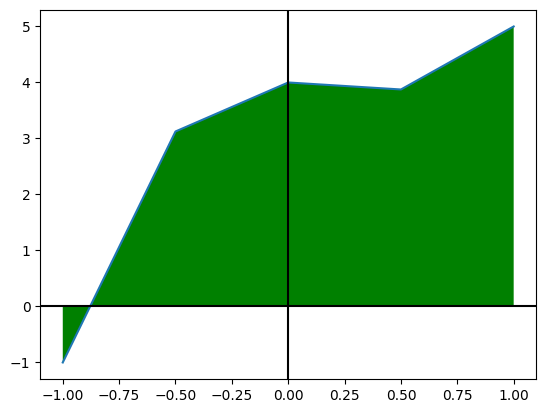

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

f = np.poly1d([3,-2,0,4])
num_of_xs = 5
x = np.linspace(-1,1,num_of_xs)
y = f(x)

plt.plot(x,y)
plt.axvline(x=0, color='k') # 검정색 x축
plt.axhline(y=0, color='k') # 검정색 y축
plt.fill_between(x, y, 0, facecolor='g')
plt.show()

In [ ]:
area = np.trapz(y,x)
print('적분값 :', area)

적분값 : 6.5


In [ ]:
from scipy import integrate
import numpy as np

f = np.poly1d([3,-2,0,4])
print(integrate.quad(f,-1,1))

(6.666666666666667, 7.49189256220043e-14)


In [ ]:
from scipy import integrate

#f = np.poly1d([3,-2,0,4])
def f(x):
  return 3*x**3 - 2*x**2 + 4

print(integrate.quad(f,-1,1))

(6.666666666666667, 7.49189256220043e-14)


In [ ]:
from scipy import integrate

print(integrate.quad(lambda x: 3*x**3 - 2*x**2 + 4,-1,1))

(6.666666666666667, 7.49189256220043e-14)


In [ ]:
from scipy import integrate
import numpy as np

def f(x):
  return np.exp(x)

print(integrate.quad(f,-np.inf,0))

(1.0000000000000002, 5.842606742906004e-11)


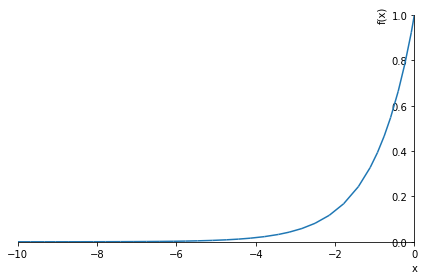

In [ ]:
import math
import sympy as sp

x = sp.Symbol('x')
f = sp.exp(x)

sp.plot(f,xlim=(-10,0),ylim=(0,1))

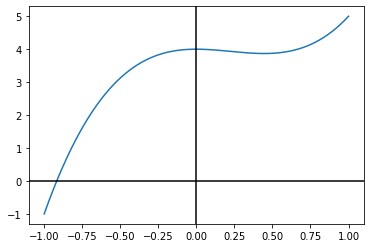

적분값 : 6.666666639994666


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

f = np.poly1d([3,-2,0,4])
num_of_xs = 10000
x = np.linspace(-1,1,num_of_xs)
y = f(x)

plt.plot(x,y)
plt.axvline(x=0, color='k') # 검정색 x축
plt.axhline(y=0, color='k') # 검정색 y축
plt.show()

area = np.trapz(y,x)
print('적분값 :', area)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

f = np.poly1d([3,-2,0,4])
num_of_xs = 100000000
x = np.linspace(-1,1,num_of_xs)
y = f(x)

plt.plot(x,y)
plt.axvline(x=0, color='k') # 검정색 x축
plt.axhline(y=0, color='k') # 검정색 y축
plt.show()

area = np.trapz(y,x)
print('적분값 :', area)

In [ ]:
import sympy as sp

x = sp.Symbol('x')

f = 3*x**3 - 2*x**2 + 4

print('적분한 방정식 :', sp.integrate(f,x))
print('적분값 :', eval(str(sp.integrate(f,(x,-1,1)))))

적분한 방정식 : 3*x**4/4 - 2*x**3/3 + 4*x
적분값 : 6.666666666666667


In [ ]:
def F(x):
  return 3*x**4/4 - 2*x**3/3 + 4*x

print('적분값 :', F(1) - F(-1))

적분값 : 6.666666666666666


In [ ]:
import sympy as sp

x = sp.Symbol('x')
a = sp.Symbol('a')

f = a*x**3 - 2*x**2 + 4

print('미분한 방정식 :', sp.diff(f,x))
print('적분한 방정식 :', sp.integrate(f,x))

미분한 방정식 : 3*a*x**2 - 4*x
적분한 방정식 : a*x**4/4 - 2*x**3/3 + 4*x


In [ ]:
import sympy as sp

x = sp.Symbol('x')

f = sp.sin(x**3-10)

print('적분한 방정식 :', sp.integrate(f,x))

적분한 방정식 : Integral(sin(x**3 - 10), x)


미분 방정식

In [ ]:
# 코딩을 위한 사전준비
import sympy as sp

x = sp.Symbol('x')
f = sp.Function('f')
y = f(x)

# 입력 (미분방정식)
diff_eq = sp.Eq(sp.diff(y,x,1),2*y)
print(diff_eq)
diff_eq

Eq(Derivative(f(x), x), 2*f(x))


Eq(Derivative(f(x), x), 2*f(x))

In [ ]:
# 처리 (미분방정식 풀기)
solution = sp.dsolve(diff_eq,y)

# 출력 (미분방정식의 해)
print(solution)
solution

Eq(f(x), C1*exp(2*x))


Eq(f(x), C1*exp(2*x))

In [ ]:
import sympy as sp

x = sp.Symbol('x')
y = sp.Function('y')

diff_eq = sp.Eq(sp.diff(y(x),x,1),2*y(x))
print(diff_eq)
diff_eq

Eq(Derivative(y(x), x), 2*y(x))


Eq(Derivative(y(x), x), 2*y(x))

In [ ]:
import sympy as sp

x = sp.Symbol('x')
a = sp.Symbol('a')
f = sp.Function('f')
y = f(x)

diff_eq = sp.Eq(sp.diff(y,x,2) + 2 * sp.diff(y,x,1),a*y + 3)
print('미분방정식 :', diff_eq)
print('미분방정식의 해 :')
sp.dsolve(diff_eq,y)

미분방정식 : Eq(2*Derivative(f(x), x) + Derivative(f(x), (x, 2)), a*f(x) + 3)
미분방정식의 해 :


Eq(f(x), C1*exp(x*(-sqrt(a + 1) - 1)) + C2*exp(x*(sqrt(a + 1) - 1)) - 3/a)

In [ ]:
import sympy as sp

x = sp.Symbol('x')
a = sp.Symbol('a')
f = sp.Function('f')
y = f(x)

diff_eq = sp.Eq(sp.diff(y,x,2) + 2 * sp.diff(y,x,1),a*y + 3)
print('미분방정식 :', diff_eq)
print('미분방정식의 해 :')
sp.dsolve(diff_eq,y,ics={f(0):0})

미분방정식 : Eq(2*Derivative(f(x), x) + Derivative(f(x), (x, 2)), a*f(x) + 3)
미분방정식의 해 :


Eq(f(x), C2*exp(x*(sqrt(a + 1) - 1)) + (-C2 + 3/a)*exp(x*(-sqrt(a + 1) - 1)) - 3/a)

In [ ]:
import sympy as sp

x = sp.Symbol('x')
a = sp.Symbol('a')
f = sp.Function('f')
y = f(x)

diff_eq = sp.Eq(sp.diff(y,x,2) + 2 * sp.diff(y,x,1),a*y + 3)
print('미분방정식 :', diff_eq)
print('미분방정식의 해 :')
sp.dsolve(diff_eq,y,ics={f(0):0,sp.diff(y,x).subs(x,0):1})

미분방정식 : Eq(2*Derivative(f(x), x) + Derivative(f(x), (x, 2)), a*f(x) + 3)
미분방정식의 해 :


Eq(f(x), (1/(2*sqrt(a + 1)) + 3/(2*a) + 3/(2*a*sqrt(a + 1)))*exp(x*(sqrt(a + 1) - 1)) + (-a*sqrt(a + 1)/(2*a**2 + 2*a) + 3*a/(2*a**2 + 2*a) - 3*sqrt(a + 1)/(2*a**2 + 2*a) + 3/(2*a**2 + 2*a))*exp(x*(-sqrt(a + 1) - 1)) - 3/a)

In [ ]:
sp.diff(y,x).subs(x,0)

Subs(Derivative(f(x), x), x, 0)

In [ ]:
import sympy as sp

t = sp.Symbol('t')
f = sp.Function('f')
y = f(t)

diff_eq = sp.Eq(sp.diff(y,t,1),-3*y)
print('미분방정식 :', diff_eq)
solution = sp.dsolve(diff_eq,y,ics={f(0):2})
print('미분방정식의 해 :', solution)
solution

미분방정식 : Eq(Derivative(f(t), t), -3*f(t))
미분방정식의 해 : Eq(f(t), 2*exp(-3*t))


Eq(f(t), 2*exp(-3*t))

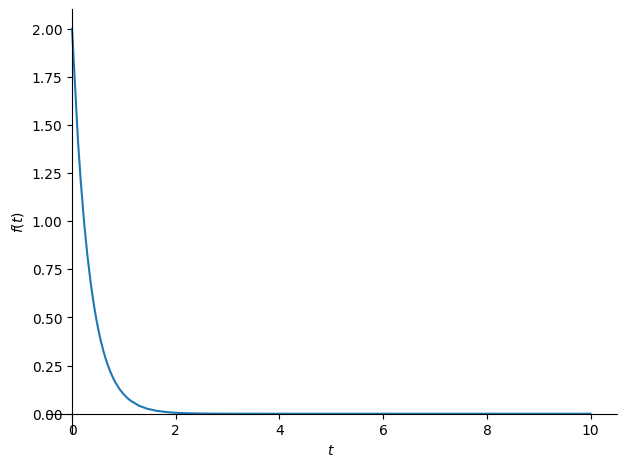

In [ ]:
sp.plot(solution.rhs, (t,0,10))

In [ ]:
solution.lhs

f(t)

In [ ]:
solution.rhs

2*exp(-3*t)

In [ ]:
print('t가 1일 때 y :',solution.rhs.subs({t:1}))
solution.rhs.subs({t:1})

t가 1일 때 y : 2*exp(-3)


2*exp(-3)

In [ ]:
from math import exp
print('t가 1일 때 y :',eval(str(solution.rhs.subs({t:1}))))

t가 1일 때 y : 0.09957413673572789


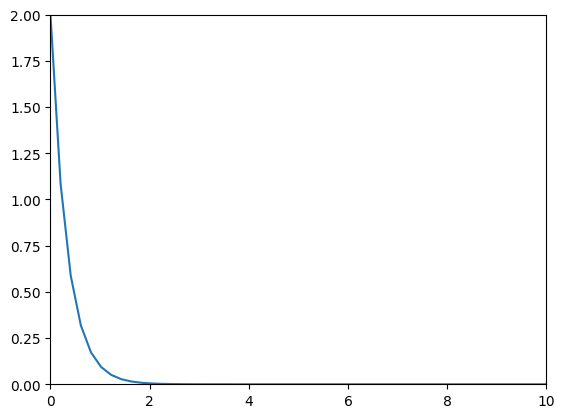

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def ft(t):
  return 2 * np.exp(-3*t)

t = np.linspace(0,10,50)
y = ft(t)

plt.plot(t,y)
plt.xlim(0,10)
plt.ylim(0,2)
plt.show()

연립미분방정식

In [ ]:
import sympy as sp

t = sp.Symbol('t')
y1 = sp.Function('y1')
y2 = sp.Function('y2')

diff_eq1 = sp.Eq(sp.diff(y1(t),t,1),y1(t) + 2*y2(t))
print('연립미분방정식 1 :', diff_eq1)
diff_eq2 = sp.Eq(sp.diff(y2(t),t,1),3*y1(t) + 2*y2(t))
print('연립미분방정식 2 :', diff_eq2)
solution = sp.dsolve((diff_eq1,diff_eq2))
print('연립미분방정식의 해 (초기값 없음-일반해) :', solution)
solution = sp.dsolve((diff_eq1,diff_eq2),ics={y1(0):1,y2(0):1})
print('연립미분방정식의 해 (초기값 있음-수치해) :', solution)

연립미분방정식 1 : Eq(Derivative(y1(t), t), y1(t) + 2*y2(t))
연립미분방정식 2 : Eq(Derivative(y2(t), t), 3*y1(t) + 2*y2(t))
연립미분방정식의 해 (초기값 없음-일반해) : [Eq(y1(t), -C1*exp(-t) + 2*C2*exp(4*t)/3), Eq(y2(t), C1*exp(-t) + C2*exp(4*t))]
연립미분방정식의 해 (초기값 있음-수치해) : [Eq(y1(t), 4*exp(4*t)/5 + exp(-t)/5), Eq(y2(t), 6*exp(4*t)/5 - exp(-t)/5)]


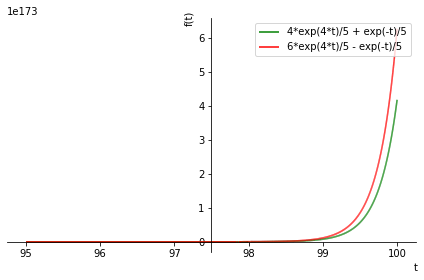

In [ ]:
graphs = sp.plot(solution[0].rhs,solution[1].rhs,(t,95,100),show=False)
graphs.legend = True
graphs[0].line_color = 'g'
graphs[1].line_color = 'r'
graphs.show()